In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
sales=pd.read_csv('sales_transactions.csv')

In [16]:
sales

,TransactionID,Date,City,CustomerID,CustomerType,Category,UnitsSold,UnitPrice,Revenue,Discount,SalesRep
0,T001,2024-01-15,Lagos,C001,New,Electronics,2,150000,300000,5000,Chuka Obasi
1,T002,2024-01-18,Abuja,C002,Returning,Appliances,1,85000,85000,0,Mary Felix
2,T003,2024-01-20,Port Harcourt,C003,New,Accessories,4,5000,20000,200,Abdul Salim
3,T004,2024-01-21,Lagos,C004,Returning,Electronics,1,160000,160000,3000,Chuka Obasi
4,T005,2024-02-01,Kano,C005,New,Appliances,2,90000,180000,4000,Mary Felix
...,...,...,...,...,...,...,...,...,...,...,...
105,T106,2024-03-05,Lagos,C046,New,Electronics,2,155000,310000,500,Abdul Salim
106,T107,2024-10-23,Port Harcourt,C061,Returning,Electronics,2,155000,310000,4000,Mary Felix
107,T108,2024-09-08,Port Harcourt,C070,New,Accessories,1,5500,5500,500,Mary Felix
108,T109,2024-02-10,Kano,C135,New,Electronics,2,150000,300000,200,Chuka Obasi


In [17]:
sales.columns    

Index(['TransactionID', 'Date', 'City', 'CustomerID', 'CustomerType',
       'Category', 'UnitsSold', 'UnitPrice', 'Revenue', 'Discount',
       'SalesRep'],
      dtype='object')

In [18]:
sales.shape

(110, 11)

In [19]:
sales.isnull().sum()

TransactionID    0
Date             0
City             0
CustomerID       0
CustomerType     0
Category         0
UnitsSold        0
UnitPrice        0
Revenue          0
Discount         0
SalesRep         0
dtype: int64

In [20]:
sales.duplicated().sum()

np.int64(0)

# total revenue

In [21]:
##total revenue
total_revenue=sales['Revenue'].sum()
print(f"the total revenue is ₦{total_revenue:,.0f}")


the total revenue is ₦29,521,000


# number of transactions recorded

In [22]:
## number of transactions recorded
len(sales['TransactionID'])


110

In [23]:
## how many distinct customers made purchases
distinct_customer=sales['CustomerID'].nunique()
distinct_customer


77

# What is the total revenue generated from Lagos alone?

In [24]:
##What is the total revenue generated from Lagos alone?
revenue_lagos = sales[sales['City'] == 'Lagos']['Revenue'].sum()
print(f"Lagos: ₦{revenue_lagos:,.0f}")

Lagos: ₦9,285,500


# How many units of "Accessories" were sold in Abuja?

In [44]:
abuja_accessories = sales[(sales['City'] == 'Abuja') & (sales['Category'] == 'Accessories')]['UnitsSold'].count()
abuja_accessories


## corrections 
sales.groupby(['Category','City'])['UnitsSold'].count()

Category     City         
Accessories  Abuja             7
             Kano              7
             Lagos             7
             Port Harcourt    17
Appliances   Abuja             9
             Kano             10
             Lagos             8
             Port Harcourt     6
Electronics  Abuja             4
             Kano             12
             Lagos            13
             Port Harcourt    10
Name: UnitsSold, dtype: int64

# What is the average discount offered across all transactions?

In [ ]:
discount=sales['Discount'].mean()
print(f"₦{discount:,.0f}")

# converting date dtypes to datetime

In [ ]:
sales.dtypes

In [ ]:
sales['Date']=pd.to_datetime(sales['Date'])

In [ ]:
sales.dtypes

 # What was the revenue for February 2024?

In [ ]:
feb_revenue = sales[
    (sales['Date'].dt.month == 2) & 
    (sales['Date'].dt.year == 2024)
]['Revenue'].sum()

print(f"₦{int(feb_revenue):,}")

# Which month had the highest sales revenue?

In [ ]:
# Extract month name
sales['Month'] = sales['Date'].dt.month_name()

# Group by month and sum revenue
monthly_revenue = (
    sales.groupby('Month')['Revenue']
    .sum()
    .reset_index(name='TotalRevenue')
)

# Get the row with the highest revenue
highest_month = monthly_revenue.loc[monthly_revenue['TotalRevenue'].idxmax()]

# Display just the month and revenue 
print(f"{highest_month['Month']}: ₦{int(highest_month['TotalRevenue']):,}")

# Create a measure to calculate monthly revenue trend

In [ ]:
monthly_trend = monthly_revenue.reset_index().rename(columns={"Date": "Month", "Revenue": "MonthlyRevenue"})
monthly_trend

In [ ]:
 # What is the revenue split between New and Returning customers?

In [ ]:
sales.groupby('CustomerType')['Revenue'].sum().reset_index()

# What is the average revenue per customer?

In [ ]:
sales.groupby('CustomerID')['Revenue'].mean().reset_index()

# How many customers bought more than once?

In [ ]:
## to count 
customers_counts=sales['CustomerID'].value_counts()
customers_counts = (customers_counts > 1).sum()
customers_counts


# product category with most revenue

In [ ]:
product=sales.groupby('Category')['Revenue'].sum().sort_values(ascending=False).nlargest(1)
product

# What is the average revenue per unit for Electronics?

In [ ]:
electronics = sales[sales["Category"] == "Electronics"]
avg_revenue_per_unit_electronics = electronics["Revenue"].sum() / electronics["UnitsSold"].sum()
avg_revenue_per_unit_electronics
print(f"₦{avg_revenue_per_unit_electronics:,.0f}")

In [ ]:
sales

# creating a new column to calculate for net revenue

In [27]:
sales['NetRevenue']=sales['Revenue']-sales['Discount']

In [28]:
sales

,TransactionID,Date,City,CustomerID,CustomerType,Category,UnitsSold,UnitPrice,Revenue,Discount,SalesRep,NetRevenue
0,T001,2024-01-15,Lagos,C001,New,Electronics,2,150000,300000,5000,Chuka Obasi,295000
1,T002,2024-01-18,Abuja,C002,Returning,Appliances,1,85000,85000,0,Mary Felix,85000
2,T003,2024-01-20,Port Harcourt,C003,New,Accessories,4,5000,20000,200,Abdul Salim,19800
3,T004,2024-01-21,Lagos,C004,Returning,Electronics,1,160000,160000,3000,Chuka Obasi,157000
4,T005,2024-02-01,Kano,C005,New,Appliances,2,90000,180000,4000,Mary Felix,176000
...,...,...,...,...,...,...,...,...,...,...,...,...
105,T106,2024-03-05,Lagos,C046,New,Electronics,2,155000,310000,500,Abdul Salim,309500
106,T107,2024-10-23,Port Harcourt,C061,Returning,Electronics,2,155000,310000,4000,Mary Felix,306000
107,T108,2024-09-08,Port Harcourt,C070,New,Accessories,1,5500,5500,500,Mary Felix,5000
108,T109,2024-02-10,Kano,C135,New,Electronics,2,150000,300000,200,Chuka Obasi,299800


# Which sales rep generated the highest total revenue?

In [ ]:
sales_rep=sales.groupby('SalesRep')['Revenue'].sum().nlargest(1)
sales_rep

# Calculate total units sold by each sales rep.

In [ ]:
sales_rep=sales.groupby(['SalesRep'])['UnitsSold'].sum().reset_index()
sales_rep

# 17. Calculates revenue from Lagos only if the customer is "New". (New customers only)

In [ ]:
lagos_new = sales[(sales["City"] == "Lagos") & (sales["CustomerType"] == "New")]
lagos_revenue=lagos_new['Revenue'].sum()
lagos_revenue
print(f"the total revenue for lagos when new customers is ₦{lagos_revenue: ,.0f}")



 # Calculate the total revenue excluding transactions from Port Harcourt.

In [ ]:
not_ph = sales[sales["City"] != "Port Harcourt"]


## calculating for revenue
not_ph_revenue=not_ph['Revenue'].sum()
print(f"the revenue when excluding port harcourt is ₦{not_ph_revenue:,.0f}")


# Calculate average units sold per transaction.

In [ ]:
sales.groupby(['TransactionID'])['UnitsSold'].mean().reset_index()

# Calculate the total discount value across all sales

In [ ]:
discount=sales['Discount'].sum()
print(f"₦{discount:,.0f}")

In [ ]:
maxrev=sales['Revenue'].max()
minrev=sales['Revenue'].min()
avg_revenue=sales['Revenue'].mean()

print(f"₦{maxrev:,.0f}")
print(f"₦{minrev:,.0f}")
print(f"₦{avg_revenue:,.0f}")



# creating charts

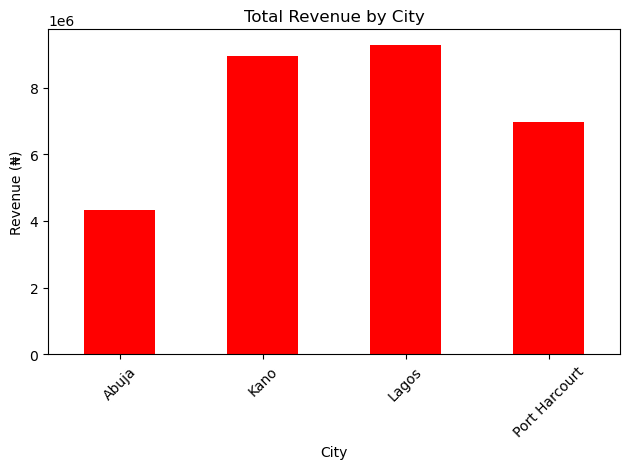

In [39]:
## total revenue per cit
city_revenue = sales.groupby("City")["Revenue"].sum()
city_revenue.plot(kind="bar", color="red")
plt.title("Total Revenue by City")
plt.xlabel("City")
plt.ylabel("Revenue (₦)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

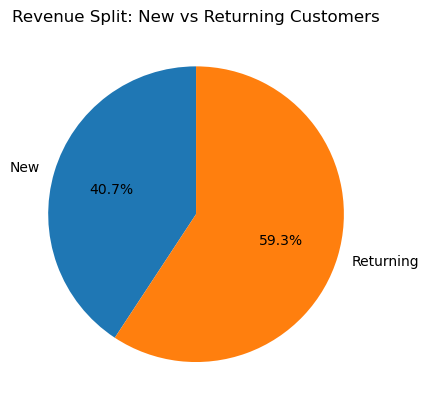

In [38]:
customer_revenue = sales.groupby("CustomerType")["Revenue"].sum()
customer_revenue.plot(kind="pie", autopct="%.1f%%", startangle=90)
plt.title("Revenue Split: New vs Returning Customers")
plt.ylabel("")
plt.show()

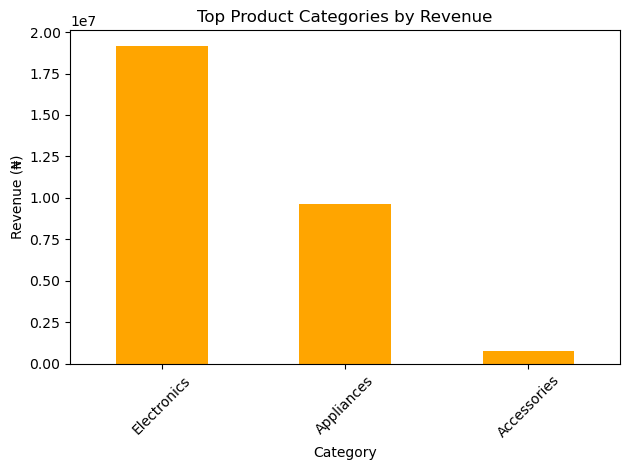

In [36]:
category_revenue = sales.groupby("Category")["Revenue"].sum().sort_values(ascending=False)
category_revenue.plot(kind="bar", color="orange")
plt.title("Top Product Categories by Revenue")
plt.xlabel("Category")
plt.ylabel("Revenue (₦)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

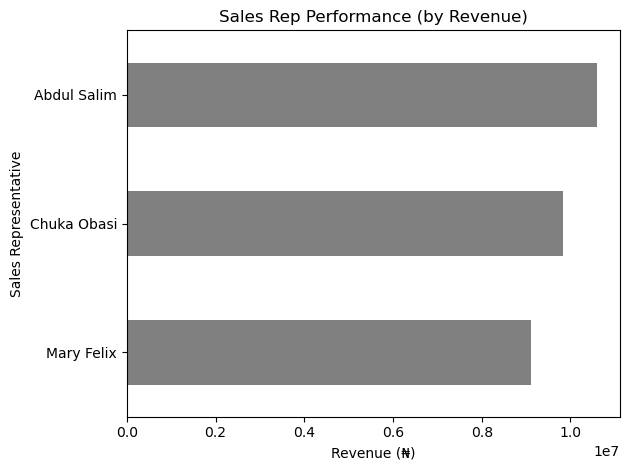

In [35]:
rep_revenue = sales.groupby("SalesRep")["Revenue"].sum().sort_values(ascending=True)
rep_revenue.plot(kind="barh", color="grey")
plt.title("Sales Rep Performance (by Revenue)")
plt.xlabel("Revenue (₦)")

plt.ylabel("Sales Representative")
plt.tight_layout()
plt.show()


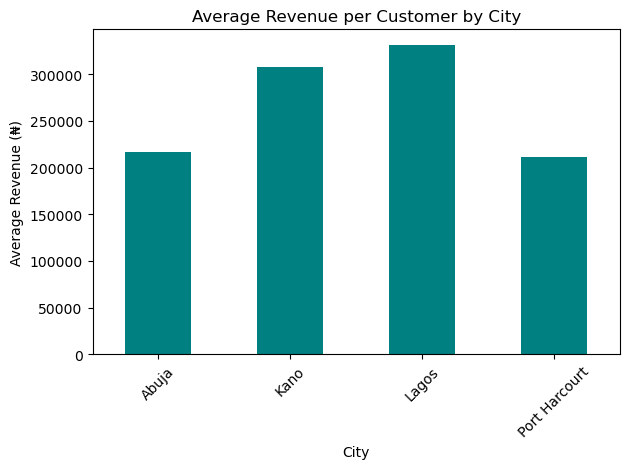

In [34]:
avg_revenue_city = sales.groupby("City")["Revenue"].mean()
avg_revenue_city.plot(kind="bar", color="teal")
plt.title("Average Revenue per Customer by City")
plt.xlabel("City")
plt.ylabel("Average Revenue (₦)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
sales['Revenue'].mean()



np.float64(268372.7272727273)

In [41]:
sales['City'].str.contains('gos')  ## this searches for somethinggg

0       True
1      False
2      False
3       True
4      False
       ...  
105     True
106    False
107    False
108    False
109     True
Name: City, Length: 110, dtype: bool

In [42]:
sales['City'].str.capitalize()

0              Lagos
1              Abuja
2      Port harcourt
3              Lagos
4               Kano
           ...      
105            Lagos
106    Port harcourt
107    Port harcourt
108             Kano
109            Lagos
Name: City, Length: 110, dtype: object

In [43]:
acc=sales.groupby(['Category','City'])['UnitsSold'].count()
acc

Category     City         
Accessories  Abuja             7
             Kano              7
             Lagos             7
             Port Harcourt    17
Appliances   Abuja             9
             Kano             10
             Lagos             8
             Port Harcourt     6
Electronics  Abuja             4
             Kano             12
             Lagos            13
             Port Harcourt    10
Name: UnitsSold, dtype: int64

In [33]:
revenue_Kano = sales[sales['City'] == 'Kano']['Revenue'].sum()
print(f"kano: ₦{revenue_Kano:,.0f}")

kano: ₦8,942,000


In [48]:
city_category_summary= sales.groupby(["City", "Category"])["Revenue"].sum().reset_index()
city_category_summary   ## to understand city vs category



,City,Category,Revenue
0,Abuja,Accessories,139500
1,Abuja,Appliances,2117000
2,Abuja,Electronics,2075000
3,Kano,Accessories,129000
4,Kano,Appliances,3201000
5,Kano,Electronics,5612000
6,Lagos,Accessories,166500
7,Lagos,Appliances,2827000
8,Lagos,Electronics,6292000
9,Port Harcourt,Accessories,314000
